In [0]:
import numpy as np
from math import factorial as fact
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [0]:
def comb(n, r):
    if r == 0: return 1
#     print n, r, n-r
    return fact(n)/(fact(n-r)*fact(r))

def err_rate(n, k):
  return (float(k)/n)

In [0]:
num = 300

Calculated Expected value

In [6]:
ratio = [0.01, 0.05, 0.1, 0.25, 0.5]
str_ratio = []
err = []
avg = []
for r in ratio:
  pos_samp = int(np.ceil(num*(1-r)))
  neg_samp = int(np.floor(num*r))
  print pos_samp, neg_samp
  
  err.append(np.array([0.]))
  avg.append(np.array([1.]))
  for i in range(1, num/2):
    k = i
    s = 0
    for x in range(k):
      s += comb(pos_samp+neg_samp+1, x)

    cn = 0
    for x in range(k):
      x = float(x)
      cn += comb(pos_samp+neg_samp+1, x) * (1 - ((x/neg_samp) + (float(k)-x)/pos_samp)/2)
    avg[-1] = np.append(avg[-1], cn/s)
    err[-1] = np.append(err[-1], err_rate(num, k))
    
for i in range(len(avg)):
  str_ratio.append("r = "+str(ratio[i]))

297 3
285 15
270 30
225 75
150 150


calculated Variance

In [7]:
sdv = []
p = 0
for r in ratio:
  pos_samp = int(np.ceil(num*(1-r)))
  neg_samp = int(np.floor(num*r))
  print pos_samp, neg_samp
  
  sdv.append(np.array([0.]))
  for i in range(1, num/2):
    k = i
    s = 0.
    for x in range(k):
      s += comb(pos_samp+neg_samp+1, x)

    a = b = c = 0
    for x in range(min(k, pos_samp)):
      x = float(x)
      cb = comb(pos_samp+neg_samp+1, x)
#       print cb
      a += cb * np.power(1 - ((x/neg_samp) + (float(k)-x)/pos_samp)/2, 2)
      b += cb * (1 - ((x/neg_samp) + (float(k)-x)/pos_samp)/2)
      c += cb * (pos_samp*np.power(x, 2) + neg_samp*np.power(k-x, 2) + pos_samp*(pos_samp+1)*x + 
                neg_samp*(neg_samp+1)*(k-x) - 2*x*(k-x)*(pos_samp+neg_samp+1))/(12*np.power(pos_samp*neg_samp, 2))
#     print s
    b = np.power(b/s, 2)
    vr = a/s - b + c/s
    vr = np.power(vr, 1./2)
    sdv[-1] = np.append(sdv[-1], vr)
#   print avg[p]
#   print 

RetSdv = np.copy(sdv)
for i in range(len(ratio)):
  RetSdv[i] = (RetSdv[i])/avg[i]

297 3
285 15
270 30
225 75
150 150


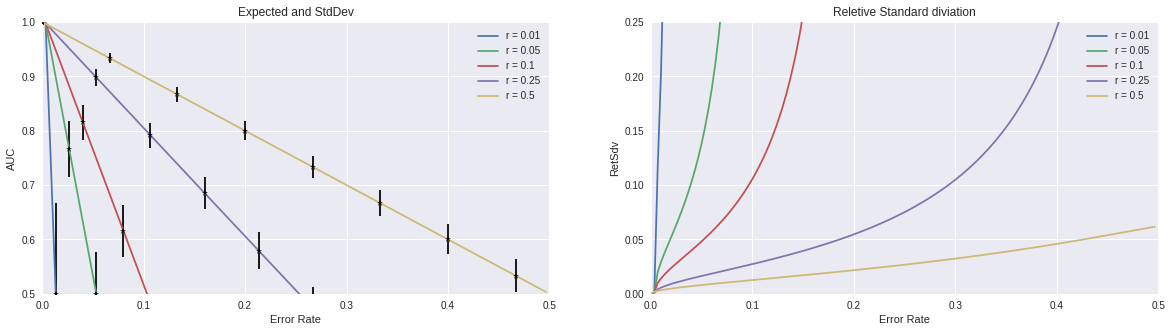

In [18]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
for i in range(len(avg)):
  ex = avg[i]
  er = err[i]
  vr = sdv[i]
  rng = ex[ex > 0].shape[0]
  ax[0].plot(er[:rng], ex[:rng], '-')
  for j in range(0, ex.shape[0], ex.shape[0]/35*(i+1)):
    ax[0].errorbar(er[j], ex[j], vr[j], linestyle='None', marker='*', color='k')
    
for i in range(len(avg)):
  vr = RetSdv[i]
  er = err[i]
  ax[1].plot(er[:int(2*ratio[i]*num)], vr[:int(2*ratio[i]*num)], '-')

ax[1].legend(str_ratio)
astr = [k for k in str_ratio]
astr.append('StdDev')
ax[0].legend(str_ratio)

ax[0].set_ylim([0.5, 1])
ax[0].set_xlim([0, 0.5])
ax[0].set_xlabel('Error Rate')
ax[0].set_ylabel('AUC')
ax[0].set_title('Expected and StdDev')
  
ax[1].set_ylim([0, .25])
ax[1].set_xlim([0, 0.5])
ax[1].set_xlabel('Error Rate')
ax[1].set_ylabel('RetSdv')
ax[1].set_title('Reletive Standard diviation')

print
